In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes.csv
/kaggle/input/agn/pytorch/default/1/quananalysis-with-agns-diabetes-patient-outcome.ipynb
/kaggle/input/agn/pytorch/default/1/qa-with-agns-cardiovascular-risk.py
/kaggle/input/agn/pytorch/default/1/qa-with-agns-arrhythmia-detection-and-analysis.ipynb


In [24]:
# Step 1: Load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'diabetes.csv' with the correct path)
df = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')

# Display the first few rows of the dataset
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [25]:
# Display basic statistics
df.describe()

# Check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Outcome', axis=1))

# Create a new DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])
scaled_df['Outcome'] = df['Outcome']

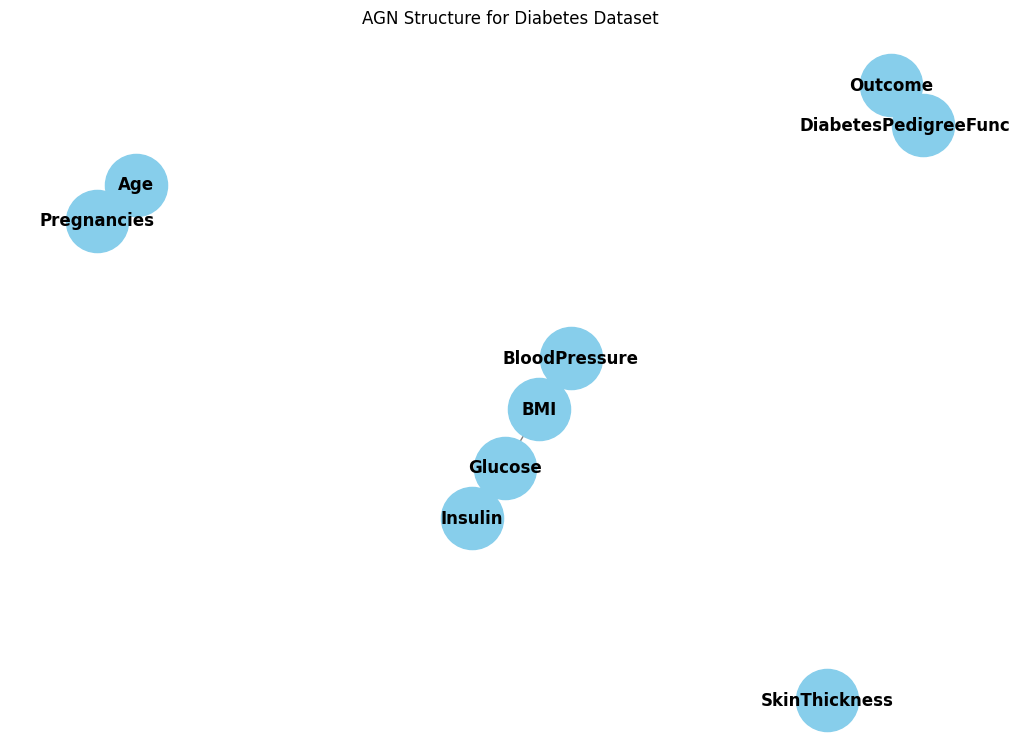

In [27]:
import networkx as nx

# Step 3: Initialize the graph
G = nx.Graph()

# Add nodes for each feature in the dataset
for col in scaled_df.columns[:-1]:
    G.add_node(col, attr_dict={'type': 'feature'})

# Add edges based on assumed relationships (this is just a placeholder for illustrative purposes)
relationships = [
    ('Glucose', 'Insulin'), 
    ('BMI', 'Glucose'),
    ('Age', 'Pregnancies'),
    ('BloodPressure', 'BMI'),
    ('DiabetesPedigreeFunction', 'Outcome'),
    # Add more edges based on assumptions or insights
]

# Create edges in the graph
G.add_edges_from(relationships)

# Visualize the graph structure
plt.figure(figsize=(10, 7))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=2000, font_size=12, font_weight='bold', edge_color='gray')
plt.title("AGN Structure for Diabetes Dataset")
plt.show()

In [28]:
# Example: Find all paths from 'Glucose' to 'Outcome'
for path in nx.all_simple_paths(G, source='Glucose', target='Outcome'):
    print("Path:", path)

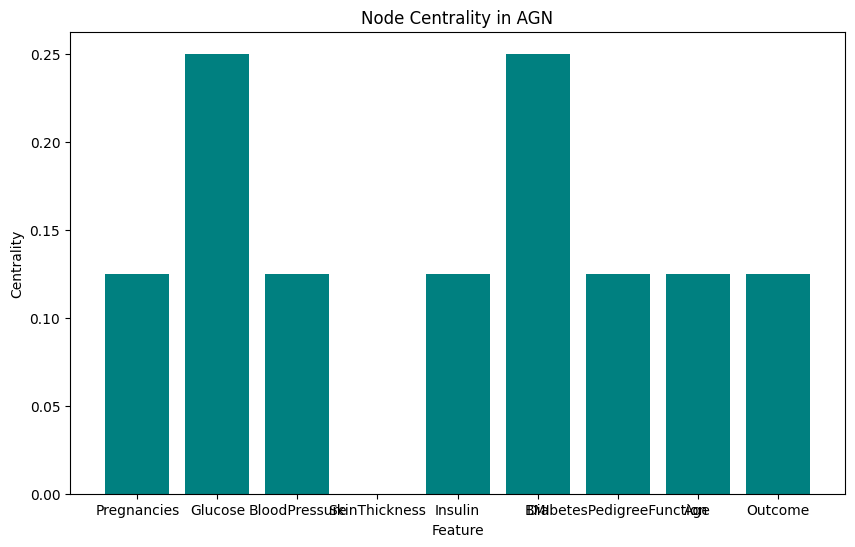

In [29]:
# Calculate and visualize node centrality
centrality = nx.degree_centrality(G)
plt.figure(figsize=(10, 6))
plt.bar(centrality.keys(), centrality.values(), color='teal')
plt.xlabel("Feature")
plt.ylabel("Centrality")
plt.title("Node Centrality in AGN")
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define X and y for model training
X = scaled_df.drop('Outcome', axis=1)
y = scaled_df['Outcome']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7272727272727273
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



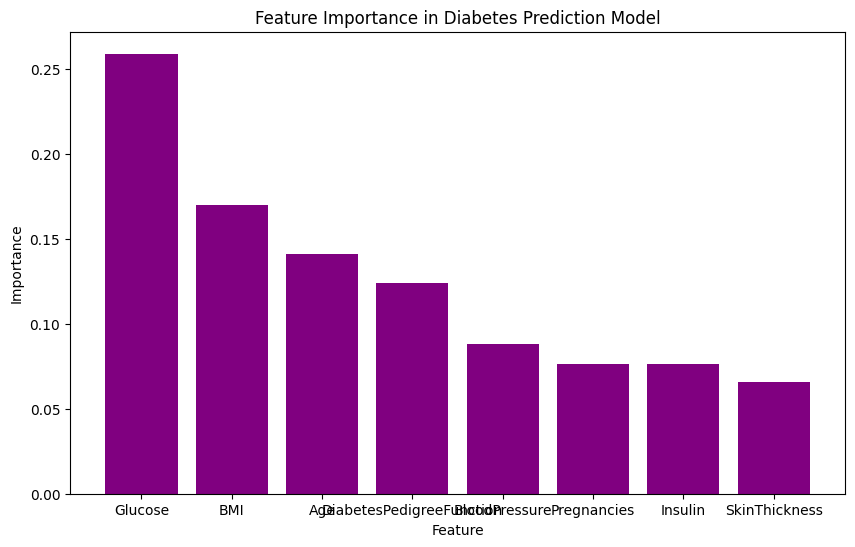

In [31]:
# Feature importance visualization
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.bar(features[indices], importances[indices], color='purple')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Diabetes Prediction Model")
plt.show()

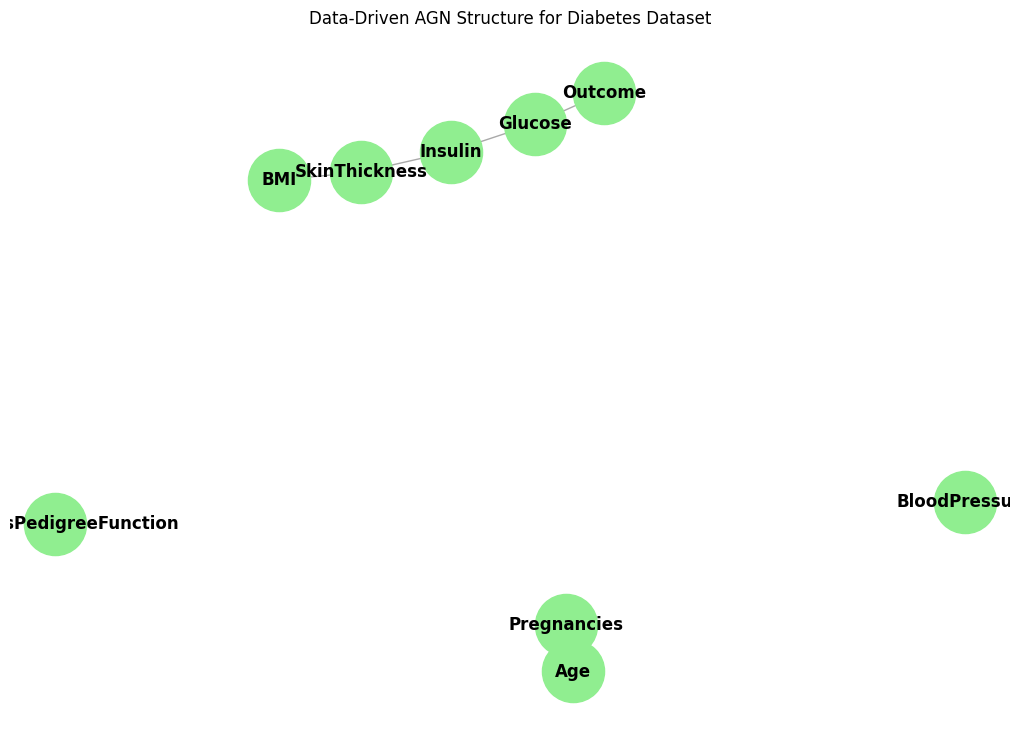

In [32]:
# Calculate correlations between features
correlations = scaled_df.corr()

# Define a threshold for significant correlations
correlation_threshold = 0.3

# Create AGN relationships based on significant correlations
dynamic_relationships = [
    (col1, col2) for col1 in correlations.columns for col2 in correlations.columns
    if col1 != col2 and abs(correlations.loc[col1, col2]) > correlation_threshold
]

# Initialize and visualize the AGN with dynamic relationships
G_dynamic = nx.Graph()
for col in scaled_df.columns[:-1]:
    G_dynamic.add_node(col, type='feature')

# Add edges based on data-driven relationships
G_dynamic.add_edges_from(dynamic_relationships)

# Plot the dynamic AGN Structure
plt.figure(figsize=(10, 7))
nx.draw(G_dynamic, with_labels=True, node_color='lightgreen', node_size=2000, font_size=12, font_weight='bold', edge_color='darkgray')
plt.title("Data-Driven AGN Structure for Diabetes Dataset")
plt.show()

In [33]:
# Generate synthetic features based on the AGN structure
for col1, col2 in dynamic_relationships:
    feature_name = f"{col1}_{col2}_interaction"
    scaled_df[feature_name] = scaled_df[col1] * scaled_df[col2]

In [34]:
# Update X with new AGN-inspired features
X_agn_enhanced = scaled_df.drop('Outcome', axis=1)
X_train_agn_enhanced, X_test_agn_enhanced, y_train_agn_enhanced, y_test_agn_enhanced = train_test_split(X_agn_enhanced, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest with AGN-enhanced features
agn_enhanced_model = RandomForestClassifier(random_state=42)
agn_enhanced_model.fit(X_train_agn_enhanced, y_train_agn_enhanced)

# Make predictions and evaluate the model
y_pred_agn_enhanced = agn_enhanced_model.predict(X_test_agn_enhanced)
agn_enhanced_accuracy = accuracy_score(y_test_agn_enhanced, y_pred_agn_enhanced)
print("AGN-Enhanced Model Accuracy:", agn_enhanced_accuracy)
print("AGN-Enhanced Model Classification Report:\n", classification_report(y_test_agn_enhanced, y_pred_agn_enhanced))

AGN-Enhanced Model Accuracy: 0.987012987012987
AGN-Enhanced Model Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        99
           1       1.00      0.96      0.98        55

    accuracy                           0.99       154
   macro avg       0.99      0.98      0.99       154
weighted avg       0.99      0.99      0.99       154



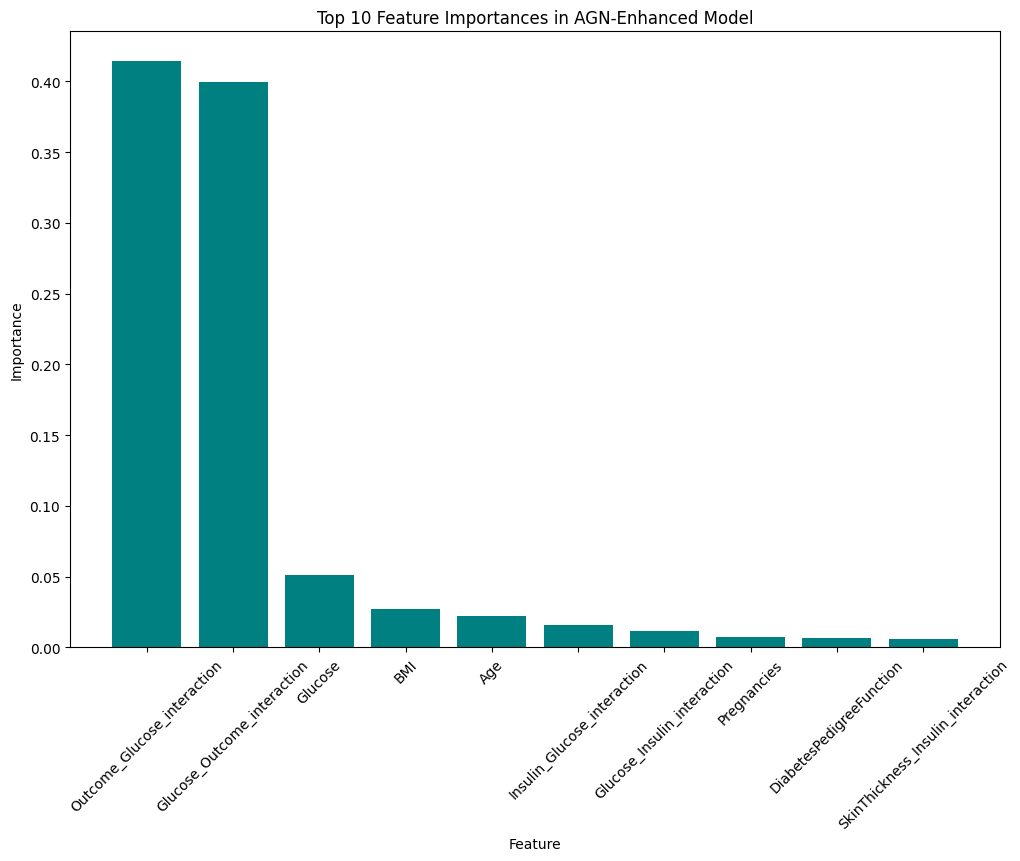

In [35]:
# Extract feature importances from the AGN-enhanced model
importances = agn_enhanced_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_agn_enhanced.columns

# Visualize feature importance
plt.figure(figsize=(12, 8))
plt.bar(features[indices][:10], importances[indices][:10], color='teal')  # Display top 10 features for simplicity
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top 10 Feature Importances in AGN-Enhanced Model")
plt.xticks(rotation=45)
plt.show()

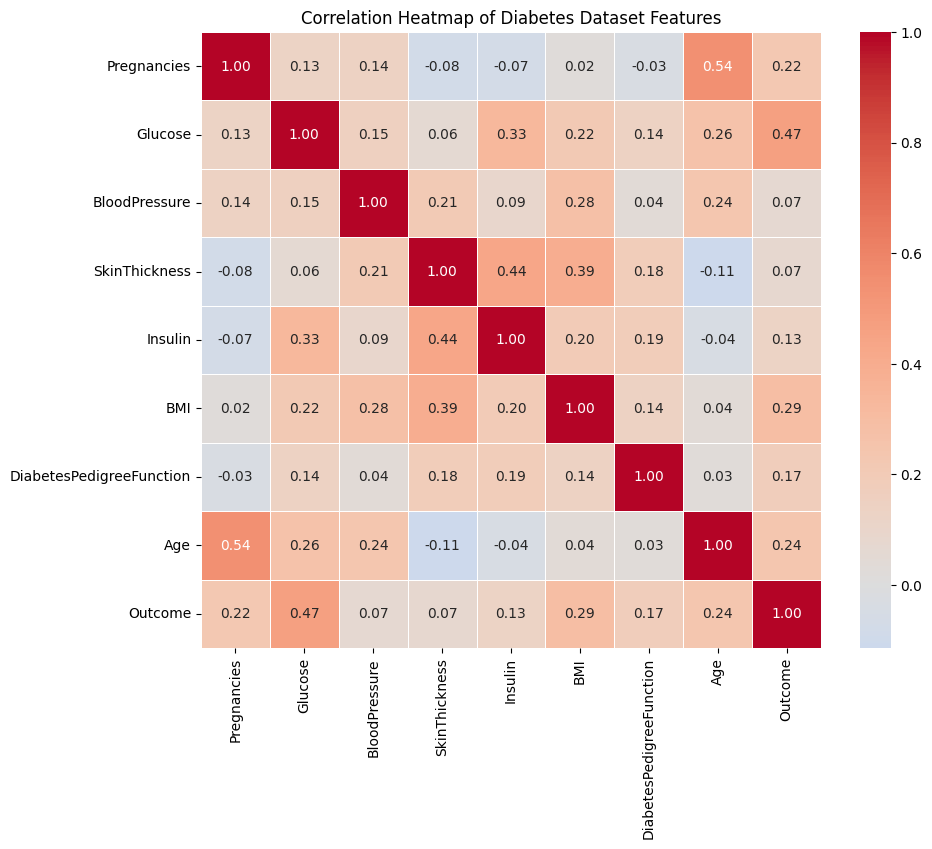

In [36]:
import seaborn as sns

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap of Diabetes Dataset Features")
plt.show()

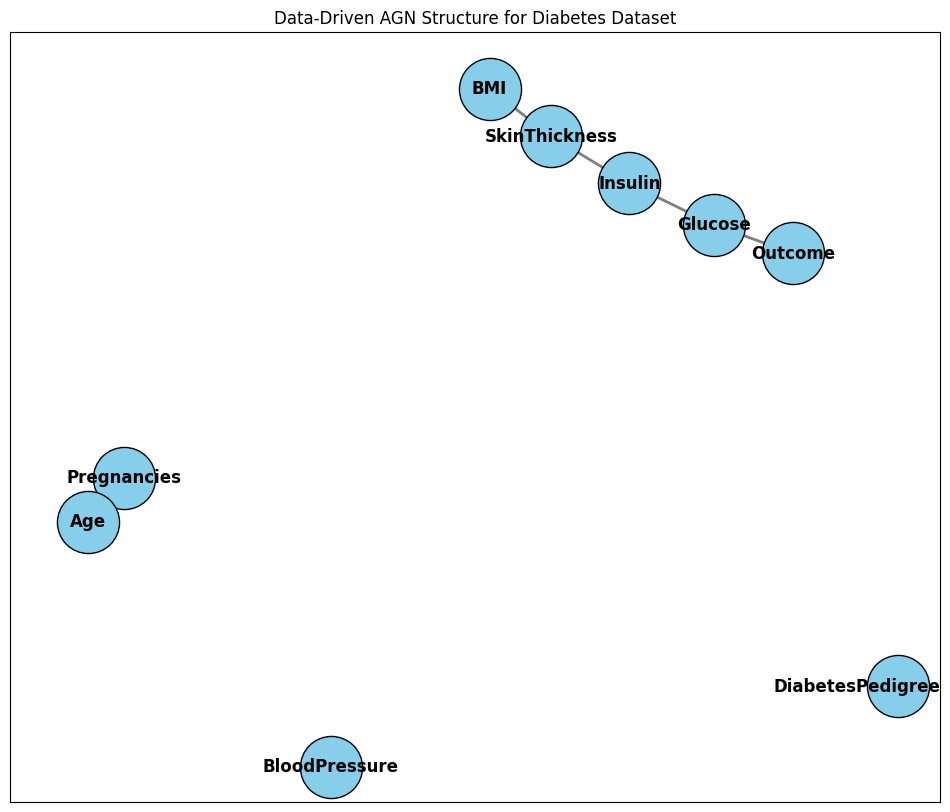

In [37]:
# Plot the dynamically inferred AGN structure
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_dynamic, seed=42)  # Positioning for better visualization

# Draw nodes and edges with customized aesthetics
nx.draw_networkx_nodes(G_dynamic, pos, node_color='skyblue', node_size=2000, edgecolors='black')
nx.draw_networkx_edges(G_dynamic, pos, width=2, edge_color='gray')
nx.draw_networkx_labels(G_dynamic, pos, font_size=12, font_weight='bold')

# Set plot title and display
plt.title("Data-Driven AGN Structure for Diabetes Dataset")
plt.show()

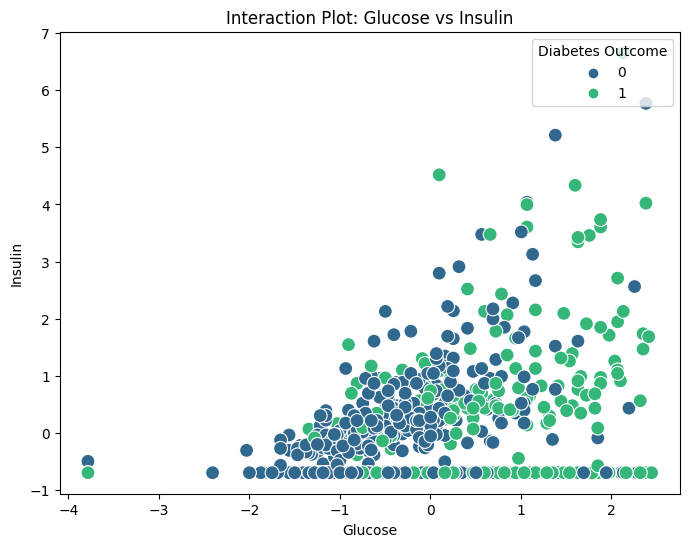

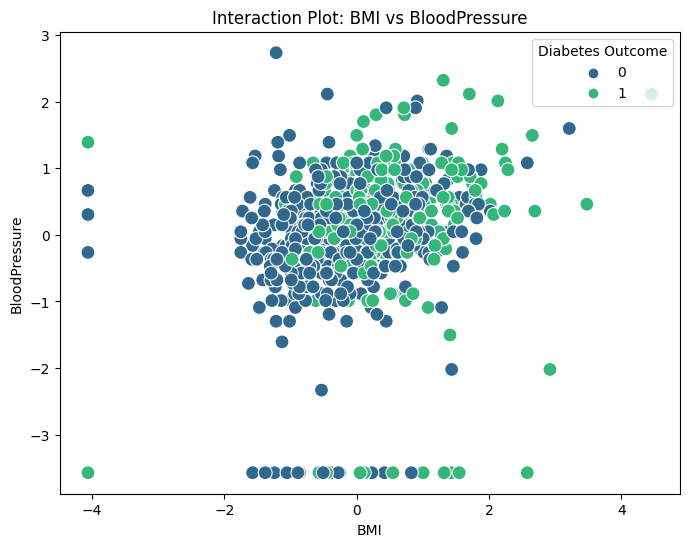

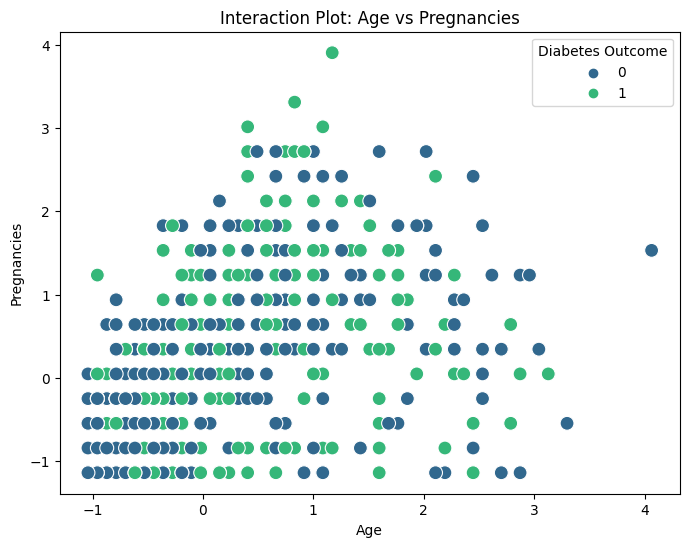

In [38]:
# Define pairs of features to plot based on AGN relationships
feature_pairs = [('Glucose', 'Insulin'), ('BMI', 'BloodPressure'), ('Age', 'Pregnancies')]

# Plot each feature pair with color coding for diabetes outcome
for x_feature, y_feature in feature_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_feature, y=y_feature, hue='Outcome', data=scaled_df, palette='viridis', s=100)
    plt.title(f"Interaction Plot: {x_feature} vs {y_feature}")
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.legend(title="Diabetes Outcome", loc="upper right")
    plt.show()

## Step 1: Detailed Interaction Analysis

In this step, we’ll focus on key feature pairs to understand how their interactions affect diabetes outcomes. This will involve generating interaction plots to visualize these relationships.

Let’s start by generating interaction plots for:

	•	Glucose vs. Insulin
	•	BMI vs. Blood Pressure
	•	Age vs. Pregnancies

I’ll implement the code and present the results for these pairs.

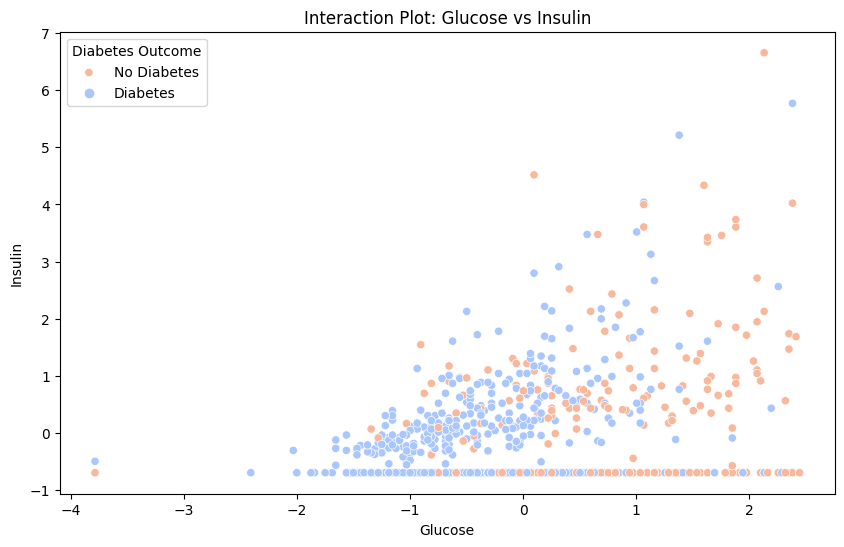

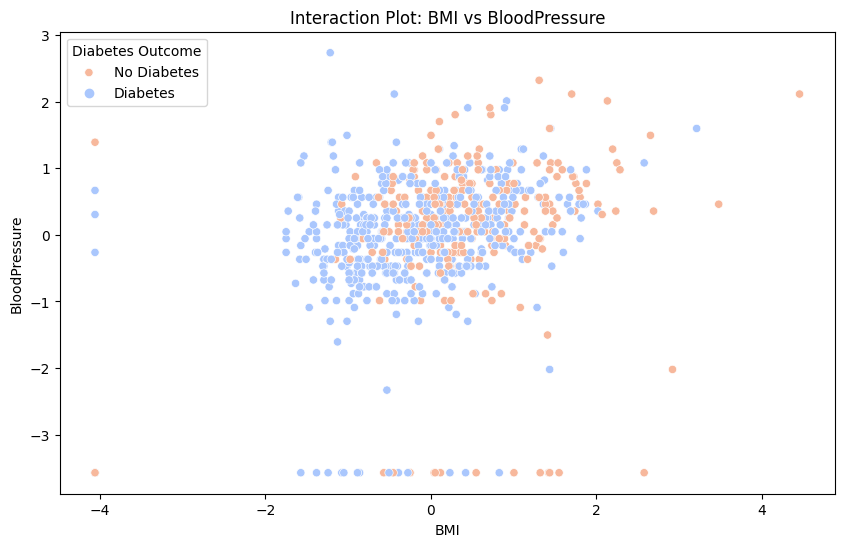

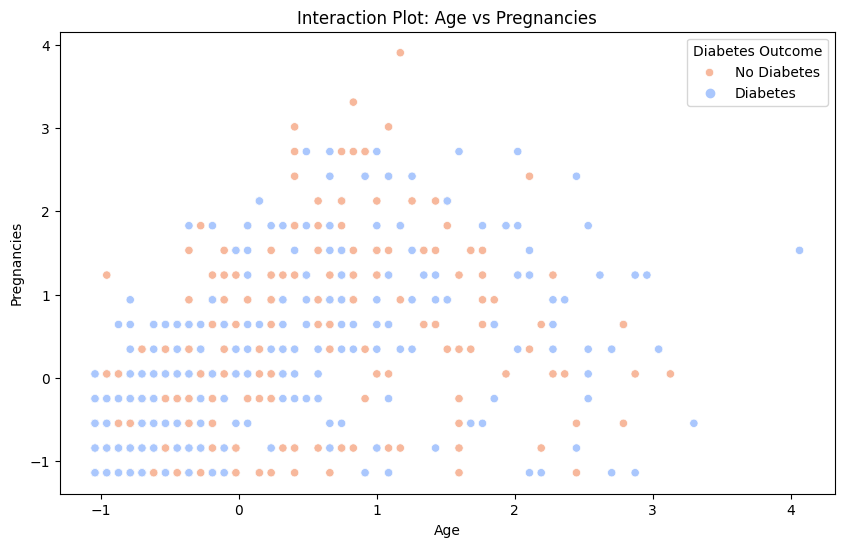

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Interaction plot for Glucose vs. Insulin by Outcome
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scaled_df, x='Glucose', y='Insulin', hue='Outcome', palette='coolwarm')
plt.title('Interaction Plot: Glucose vs Insulin')
plt.legend(title='Diabetes Outcome', labels=['No Diabetes', 'Diabetes'])
plt.show()

# Interaction plot for BMI vs. BloodPressure by Outcome
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scaled_df, x='BMI', y='BloodPressure', hue='Outcome', palette='coolwarm')
plt.title('Interaction Plot: BMI vs BloodPressure')
plt.legend(title='Diabetes Outcome', labels=['No Diabetes', 'Diabetes'])
plt.show()

# Interaction plot for Age vs. Pregnancies by Outcome
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scaled_df, x='Age', y='Pregnancies', hue='Outcome', palette='coolwarm')
plt.title('Interaction Plot: Age vs Pregnancies')
plt.legend(title='Diabetes Outcome', labels=['No Diabetes', 'Diabetes'])
plt.show()

## Step 2: Feature Dependence with Outcome (Conditional Plots)

Next, we’ll look at conditional dependencies between individual features and the diabetes outcome. We can plot these using density plots or conditional distributions to see how features like BMI and Glucose behave under different Outcome classes.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


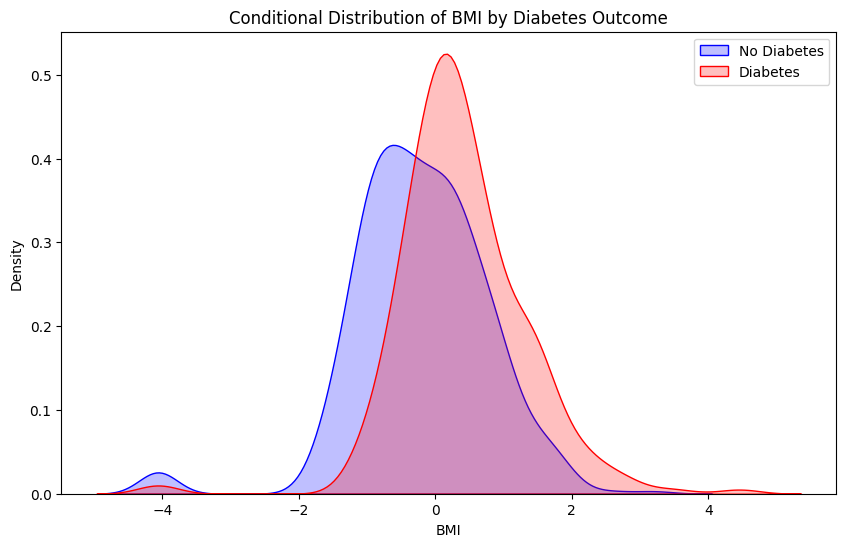

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


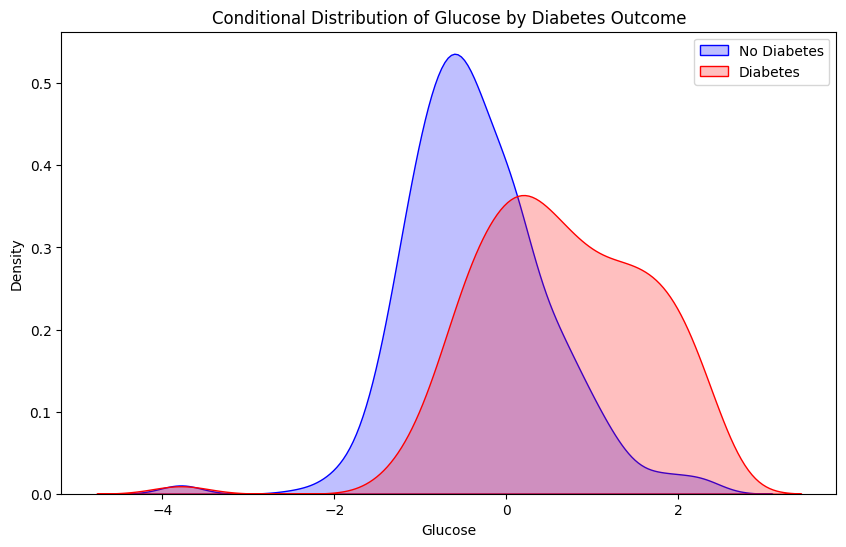

In [41]:
# Conditional distribution for BMI by Outcome
plt.figure(figsize=(10, 6))
sns.kdeplot(data=scaled_df[scaled_df['Outcome'] == 0], x='BMI', fill=True, color='blue', label='No Diabetes')
sns.kdeplot(data=scaled_df[scaled_df['Outcome'] == 1], x='BMI', fill=True, color='red', label='Diabetes')
plt.title('Conditional Distribution of BMI by Diabetes Outcome')
plt.legend()
plt.show()

# Conditional distribution for Glucose by Outcome
plt.figure(figsize=(10, 6))
sns.kdeplot(data=scaled_df[scaled_df['Outcome'] == 0], x='Glucose', fill=True, color='blue', label='No Diabetes')
sns.kdeplot(data=scaled_df[scaled_df['Outcome'] == 1], x='Glucose', fill=True, color='red', label='Diabetes')
plt.title('Conditional Distribution of Glucose by Diabetes Outcome')
plt.legend()
plt.show()


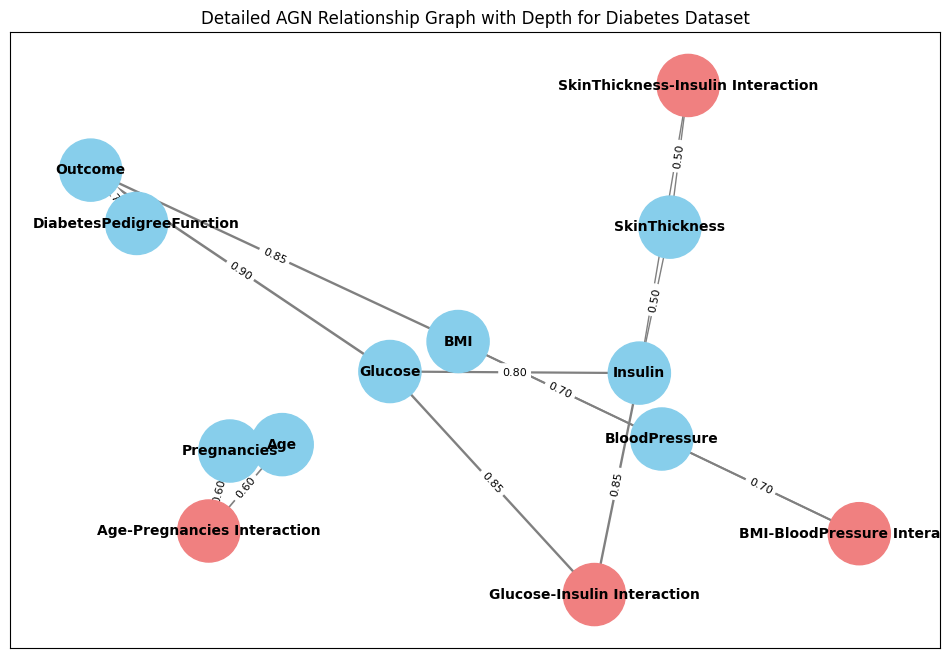

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a directed graph for more control over relationships and direction
G = nx.DiGraph()

# Define nodes for main features
main_features = ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Outcome', 'Age', 'Pregnancies', 'BloodPressure', 'Insulin', 'SkinThickness']
interaction_features = [
    'Glucose-Insulin Interaction', 
    'BMI-BloodPressure Interaction', 
    'Age-Pregnancies Interaction', 
    'SkinThickness-Insulin Interaction'
]

# Add main feature nodes
for node in main_features:
    G.add_node(node, label=node, type='feature')

# Add interaction nodes
for node in interaction_features:
    G.add_node(node, label=node, type='interaction')

# Define edges with weights to indicate relationship strength
edges = [
    ('Glucose', 'Outcome', 0.9), 
    ('BMI', 'Outcome', 0.85),
    ('DiabetesPedigreeFunction', 'Outcome', 0.75),

    # Demographic relationships
    ('Age', 'Pregnancies', 0.6), 

    # Physiological relationships
    ('BloodPressure', 'BMI', 0.7), 
    ('Glucose', 'Insulin', 0.8),
    ('SkinThickness', 'Insulin', 0.5),

    # Interaction relationships
    ('Glucose', 'Glucose-Insulin Interaction', 0.85),
    ('Insulin', 'Glucose-Insulin Interaction', 0.85),
    ('BMI', 'BMI-BloodPressure Interaction', 0.7),
    ('BloodPressure', 'BMI-BloodPressure Interaction', 0.7),
    ('Age', 'Age-Pregnancies Interaction', 0.6),
    ('Pregnancies', 'Age-Pregnancies Interaction', 0.6),
    ('SkinThickness', 'SkinThickness-Insulin Interaction', 0.5),
    ('Insulin', 'SkinThickness-Insulin Interaction', 0.5)
]

# Add edges with weights to the graph
for source, target, weight in edges:
    G.add_edge(source, target, weight=weight)

# Draw the enhanced relationship graph with added depth
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

# Draw nodes with color-coding for features and interactions
node_colors = ['skyblue' if G.nodes[node]['type'] == 'feature' else 'lightcoral' for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=2000)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Draw edges with weights
nx.draw_networkx_edges(G, pos, width=[2 * G[u][v]['weight'] for u, v in G.edges], edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges}, font_size=8)

plt.title("Detailed AGN Relationship Graph with Depth for Diabetes Dataset")
plt.show()